# TP1 de robótica
Caio Teles Cunha


Ivan Vilaça

## Questão 1
Anexado a Cena junto do notebook

## Questão 2
W é o referencial do mundo


P é o referencial da planta


R é o referencial do robô


C e C1 são os referenciais das cadeiras


H e H1 são os referenciais das pessoas


M é o referencial da mesa


Twp é a transformada do mundo para planta


Twr é a transformada do mundo para o robô


Trc1 é a transformada do robô para a cadeira 1


Tpm é a transformada da planta para a mesa


Tpc é a transformada da planta para a cadeira


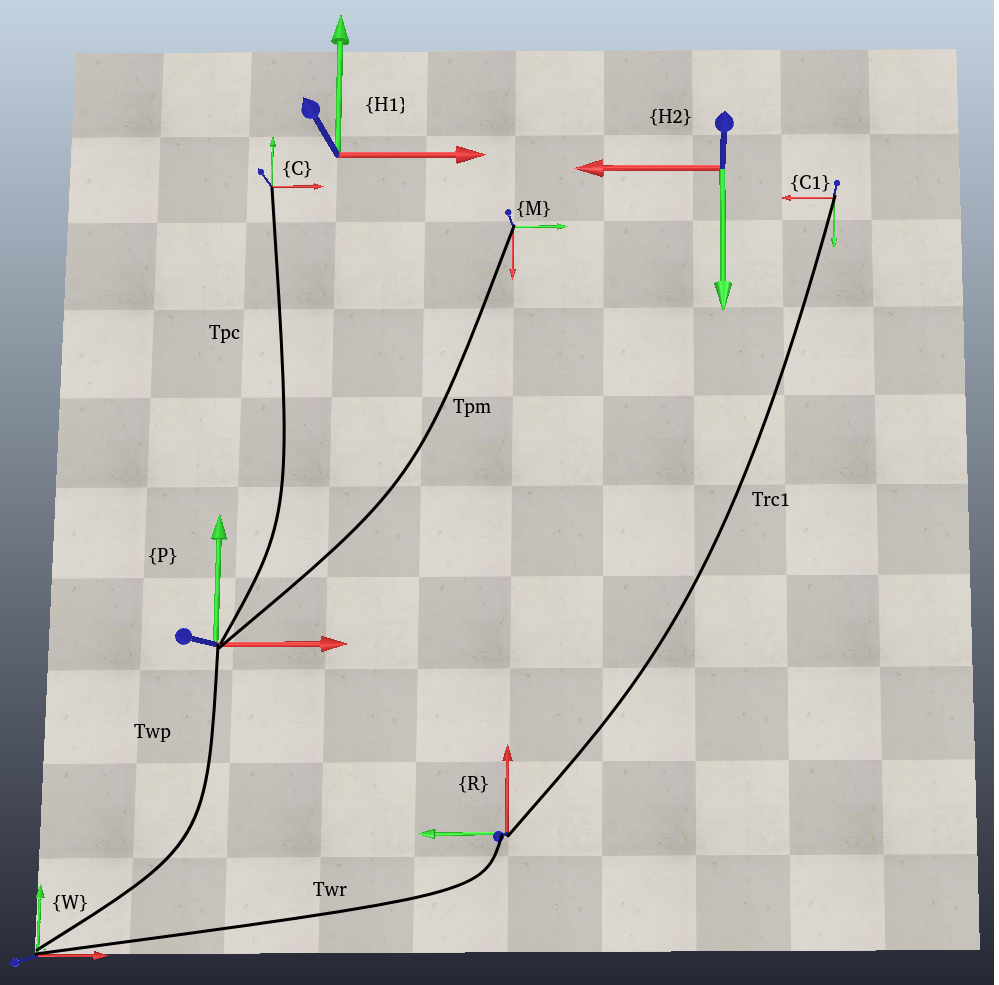

## Questão 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

client = RemoteAPIClient()
sim = client.require('sim')

In [3]:

def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta),-np.sin(theta)],
                      [ 0, np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [-np.sin(theta), 0, np.cos(theta)]])


def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):

    axis_size = 1.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)
    


### Função para obter posição, angulos de euler e plotar referenciais

In [4]:
def getPosition(handleObject):
    position = sim.getObjectPosition(handleObject)
    return position

In [5]:
def getEulerAngles(handleObject):
    eulerAngles = sim.getObjectOrientation(handleObject)
    return eulerAngles

In [6]:
def getRelativePosition(handleObject,handleReference):
    position = sim.getObjectPosition(handleObject,handleReference)
    return position

In [7]:
def getRelativeEulerAngles(handleObject,handleReference):
    eulerAngles = sim.getObjectOrientation(handleObject,handleReference)
    return eulerAngles

In [8]:
def plotFrame(position,eulerAngles):
    # Frame Object
    Porg = np.array(position)    
    R = Rz(eulerAngles[2])
    plot_frame(Porg, R)

Program started
Program ended


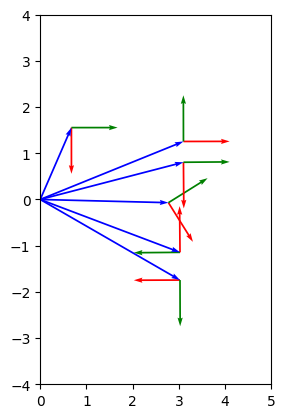

In [9]:
print ('Program started')
sim.startSimulation()

# Handle do Robo
robot_handle = sim.getObject("/Pioneer_p3dx")
# Esse ponto é a posição do robô em relação ao mundo
robot_position = getPosition(robot_handle)
robot_position = np.array(robot_position)
# Orientação do robô em relação ao mundo
robot_orientation = getEulerAngles(robot_handle)
# Matriz de rotação do robo em relação ao mundo
# A orientação do robô só está rotacionada em Z
Rur = Rz((robot_orientation[2]))

# Matriz de rotação do mundo em relação ao robo
Rru = np.transpose(Rur)


# Concatena o vetor origem ao final (coluna)
Tur = np.column_stack((Rur, robot_position))
# Concatena o vetor auxiliar embaixo (linha)
aux = np.array([0, 0, 0, 1])
Tur = np.row_stack((Tur, aux))

# Inverte para conseguir a transformada de robo para mundo
Tru = np.linalg.inv(Tur)

# Com a matriz de transformação pronta basta multiplica-la pela posição dos outros
# objetos da cena (lembrando de concatenar 1 no final)

# Frame da planta
plant_handle = sim.getObject("/indoorPlant")
plant_position = getPosition(plant_handle)
plant_position = np.append(plant_position,1)

plant_position = Tru @ plant_position

# Orientação da planta em relação ao robo
plant_orientation = getRelativeEulerAngles(plant_handle,robot_handle)

# Matriz de rotação da planta em relação ao robo
Rrp = Rz((plant_orientation[2]))

# usaremos a origem do sistema de coordenadas como a origem do nosso frame do robô
pr_org = np.array([0, 0])

plt.figure()
plot_frame(plant_position[:3], Rrp)

# Vetor da origem do robô para a planta
plt.quiver(*pr_org[:2], *plant_position[:2], color='b', angles='xy', scale_units='xy', scale=1)


# Fazendo o mesmo para todos os outros objetos

# Referencial cadeira [0]
chair_handle = sim.getObject("/diningChair{0}")
chair_position = getPosition(chair_handle)
chair_position = np.append(chair_position,1)
chair_position = Tru @ chair_position

chair_orientation = getRelativeEulerAngles(chair_handle,robot_handle)
Rrc = Rz((chair_orientation[2]))

plot_frame(chair_position[:3], Rrc)

plt.quiver(*pr_org[:2], *chair_position[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Referencial cadeira [1]
chair_one_handle = sim.getObject("/diningChair{1}")
chair_one_position = getPosition(chair_one_handle)
chair_one_position = np.append(chair_one_position,1)
chair_one_position = Tru @ chair_one_position

chair_one__orientation = getRelativeEulerAngles(chair_one_handle,robot_handle)
Rrc = Rz((chair_one__orientation[2]))

plot_frame(chair_one_position[:3], Rrc)
plt.quiver(*pr_org[:2], *chair_one_position[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Referencial mesa
dining_table_handle = sim.getObject("/diningTable")

dining_table_position = getPosition(dining_table_handle)
dining_table_position = np.append(dining_table_position,1)
dining_table_position = Tru @ dining_table_position

dining_table_orientation = getRelativeEulerAngles(dining_table_handle,robot_handle)
Rrd = Rz((dining_table_orientation[2]))

plot_frame(dining_table_position[:3], Rrd)
plt.quiver(*pr_org[:2], *dining_table_position[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Referencial pessoa
human_handle = sim.getObject("/Bill{0}")

human_position = getPosition(human_handle)
human_position = np.append(human_position,1)
human_position = Tru @ human_position

human_orientation = getRelativeEulerAngles(human_handle,robot_handle)
Rrd = Rz((human_orientation[2]))

plot_frame(human_position[:3], Rrd)
plt.quiver(*pr_org[:2], *human_position[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Referencial pessoa{1}
human_one_handle = sim.getObject("/Bill{1}")

human_one_position = getPosition(human_one_handle)
human_one_position = np.append(human_one_position,1)
human_one_position = Tru @ human_one_position

human_one_orientation = getRelativeEulerAngles(human_one_handle,robot_handle)
Rrd = Rz((human_one_orientation[2]))

plot_frame(human_one_position[:3], Rrd)
plt.quiver(*pr_org[:2], *human_one_position[:2], color='b', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((-0, 5, -4, 4))

    
sim.stopSimulation()
print ('Program ended')

## Questão 4

Fazer o mesmo da questão 3, mas com o robô em 3 posições diferentes. Alterei as posições dentro do coppelia e plotei uma de cada vez.

### Posição 1

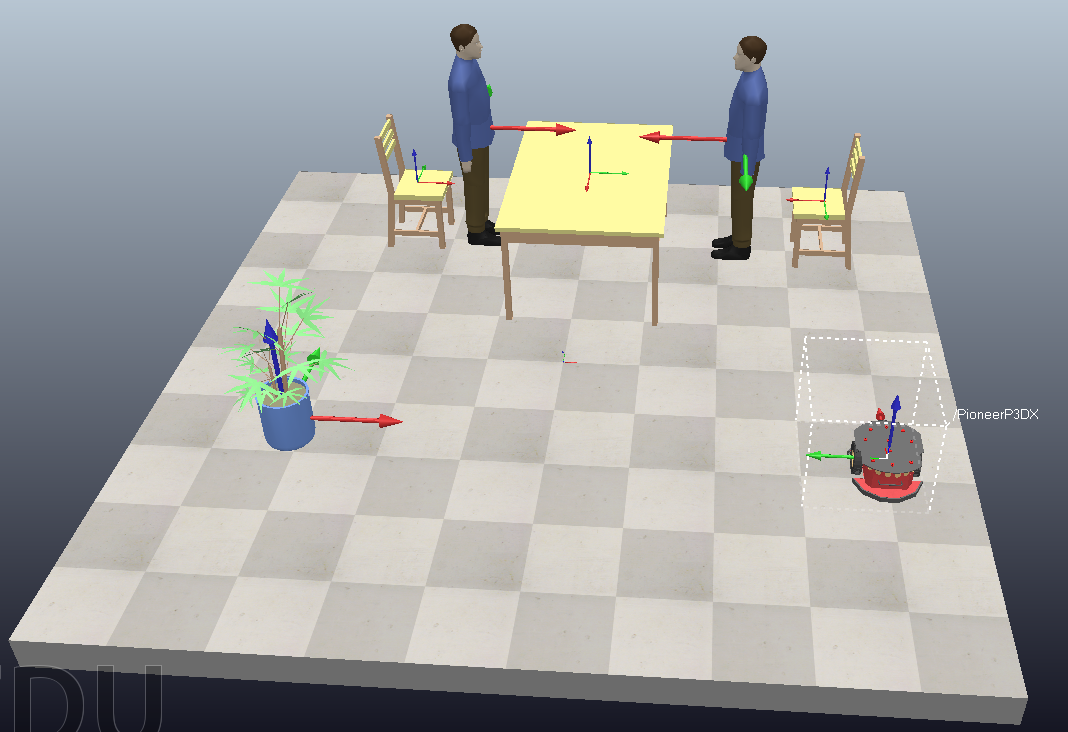


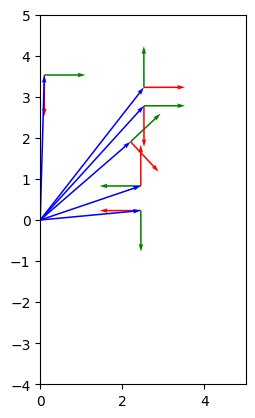



### Posição 2

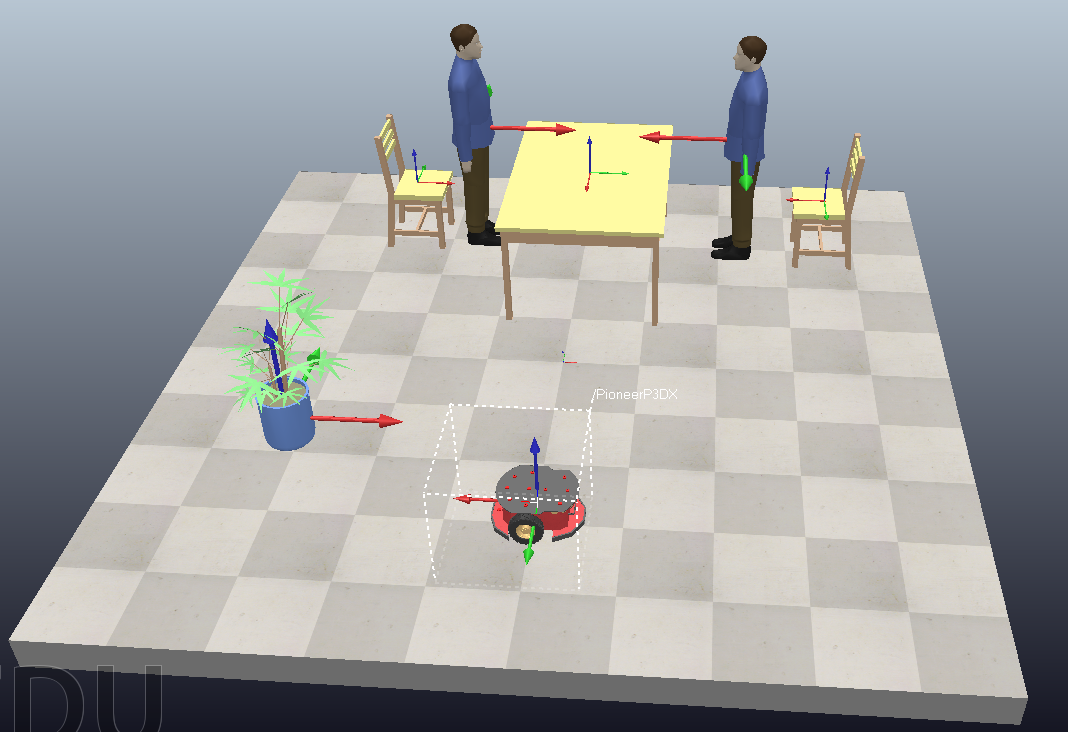


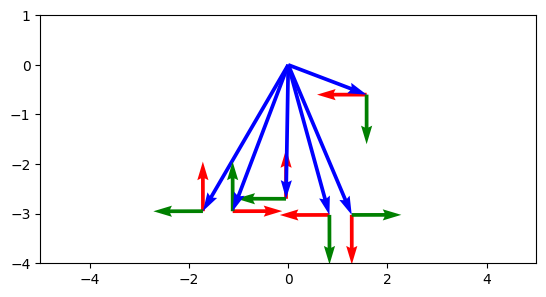

### Posição 3

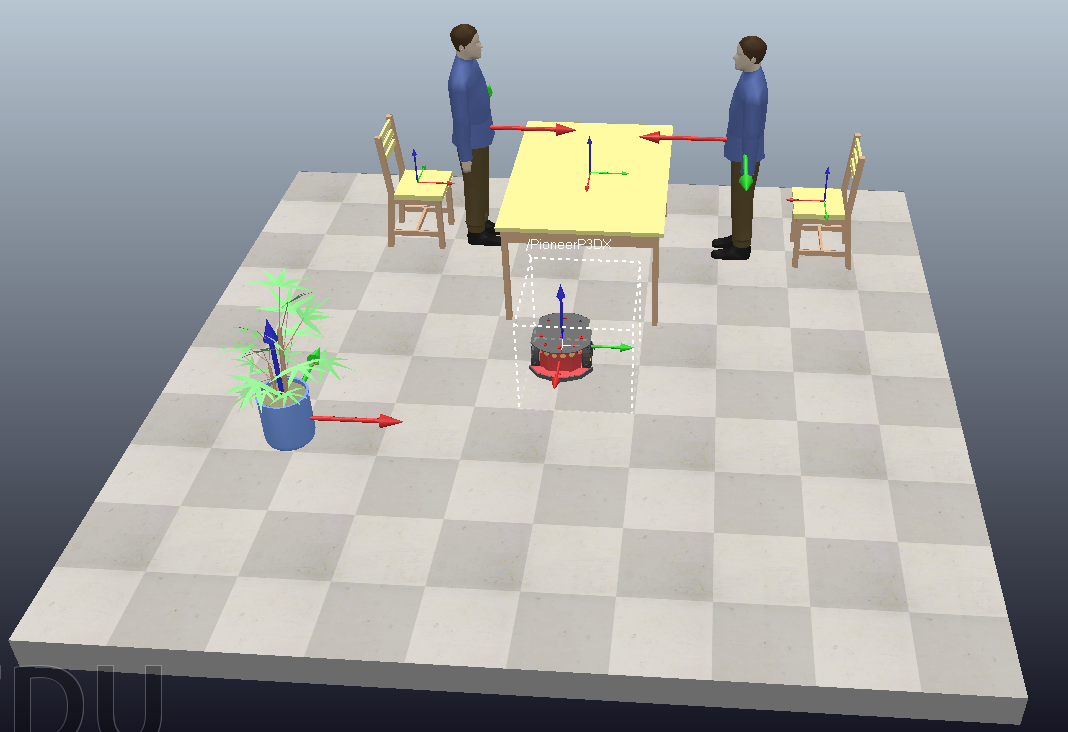


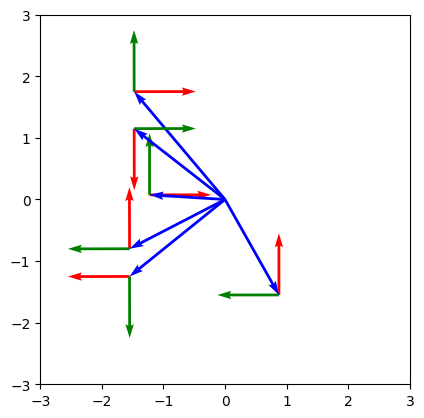

## Questão 5

In [37]:
# atualizando para a versão mais nova da API
def readSensorData(range_data_signal_id="hokuyo_range_data", angle_data_signal_id="hokuyo_angle_data"):

    # the first call should be non-blocking to avoid getting out-of-sync angle data
    string_range_data = sim.getStringSignal(range_data_signal_id)

    # the second call should block to avoid out-of-sync scenarios
    # between your python script and the simulator's main loop
    # (your script may be slower than the simulator's main loop, thus
    # slowing down data processing)
    string_angle_data = sim.getStringSignal(angle_data_signal_id)

    # check the if both data were obtained correctly
    if string_angle_data and string_range_data:
        # unpack data from range and sensor messages
        raw_range_data = sim.unpackFloatTable(string_range_data)
        raw_angle_data = sim.unpackFloatTable(string_angle_data)

        return raw_range_data, raw_angle_data

    # return none in case were nothing was gotten from the simulator
    return [],[]

# Usando a transformada para transformar um ponto no referencial do laser para um ponto no referencial do mundo
def draw_laser_data(laser_data,transformation_matrix,robot_position, max_sensor_range=5):

    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
        
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.1:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            point_laser = np.array([x,y,0,1])
            point_world = transformation_matrix @ point_laser
            ax.plot(point_world[0], point_world[1], 'o', color=c)

    # Plotando ele mesmo como um círculo verde
    ax.plot(robot_position[0], robot_position[1], 'go', markersize=10)
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])

Program started
(robô → mundo)
[[ 6.47987391e-05 -9.99999998e-01  0.00000000e+00  5.53551417e-03]
 [ 9.99999998e-01  6.47987391e-05  0.00000000e+00 -1.55033416e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.38677026e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(laser → robô)
[[ 1.00000000e+00 -7.25272952e-18  0.00000000e+00  0.00000000e+00]
 [ 7.25272952e-18  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.50000006e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(mundo → laser)
[[ 6.47987391e-05 -9.99999998e-01  0.00000000e+00  5.53551417e-03]
 [ 9.99999998e-01  6.47987391e-05  0.00000000e+00 -1.55033416e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  2.88677031e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Program ended


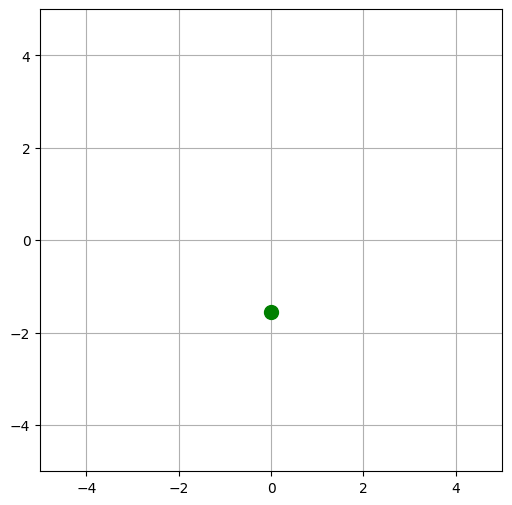

In [38]:
print ('Program started')
sim.startSimulation()

# Handle do Robo
robot_handle = sim.getObject("/Pioneer_p3dx")

# Esse ponto é a posição do robô em relação ao mundo
robot_position = getPosition(robot_handle)
robot_position = np.array(robot_position)

# Orientação do robô em relação ao mundo
robot_orientation = getEulerAngles(robot_handle)

# Matriz de rotação do robo em relação ao mundo
Rur = Rz((robot_orientation[2]))

# Concatena o vetor origem ao final (coluna)
Tur = np.column_stack((Rur, robot_position))
# Concatena o vetor auxiliar embaixo (linha)
aux = np.array([0, 0, 0, 1])
Tur = np.row_stack((Tur, aux))

print("(robô → mundo)")
print(Tur)

# Handle Laser
laser_handle = sim.getObject("/Pioneer_p3dx/fastHokuyo")
laser_position = getRelativePosition(laser_handle,robot_handle)
laser_orientation = getRelativeEulerAngles(laser_handle,robot_handle)

# Matriz de rotação do laser em relação ao robo
Rrl = Rz((laser_orientation[2]))
# Concatena o vetor origem ao final (coluna)
Trl = np.column_stack((Rrl, laser_position))
# Concatena o vetor auxiliar embaixo (linha)
aux = np.array([0, 0, 0, 1])
Trl = np.row_stack((Trl, aux))

print("(laser → robô)")
print(Trl)

Tul = Tur @ Trl
print("(mundo → laser)")
print(Tul)


# Handle para os dados do LASER
laser_range_data = "hokuyo_range_data"
laser_angle_data = "hokuyo_angle_data"

# Prosseguindo com as leituras
raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)
laser_data = np.array([raw_angle_data, raw_range_data]).T

draw_laser_data(laser_data,Tul,robot_position)



plt.axis('scaled')
plt.axis((-5, 5, -5, 5))

sim.stopSimulation()
print ('Program ended')

### Posição 1

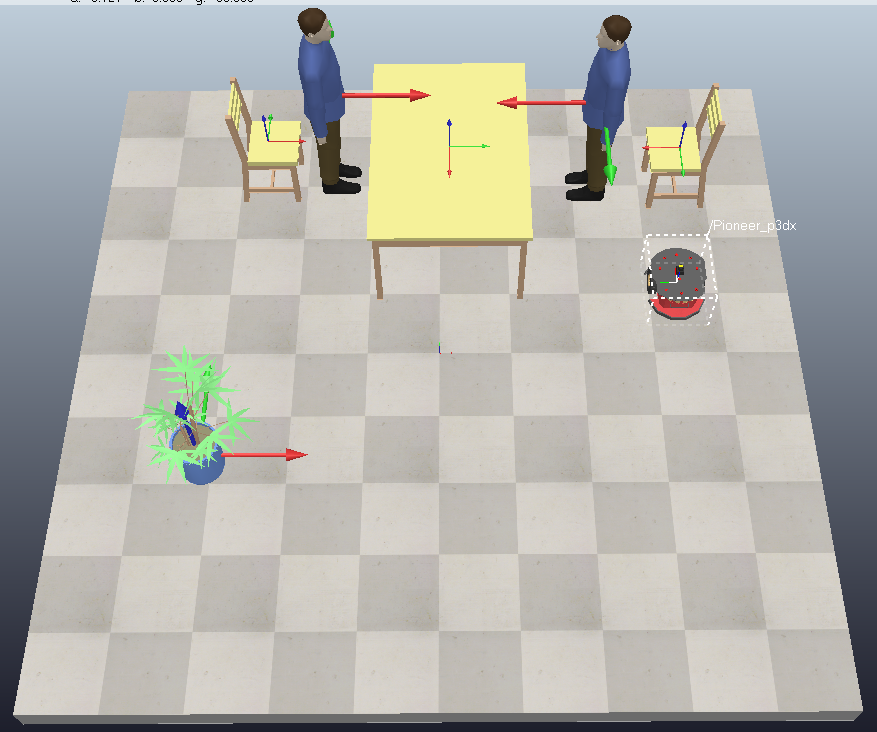


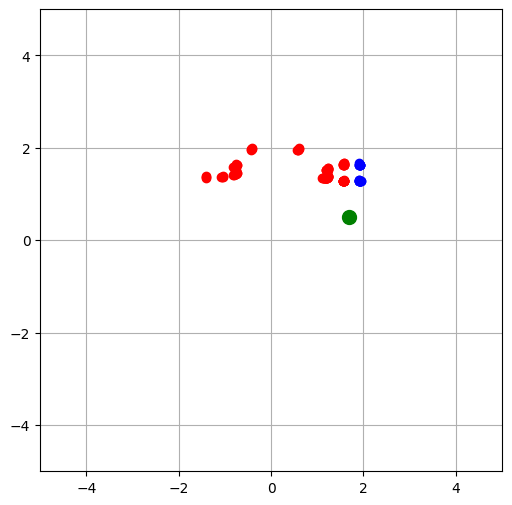

### Posição 2

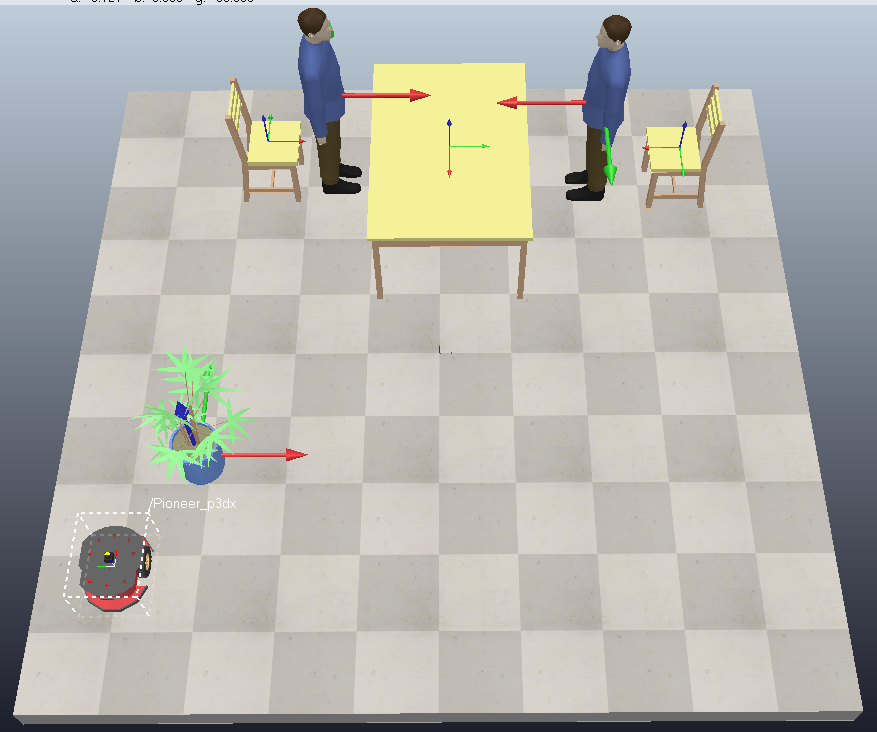


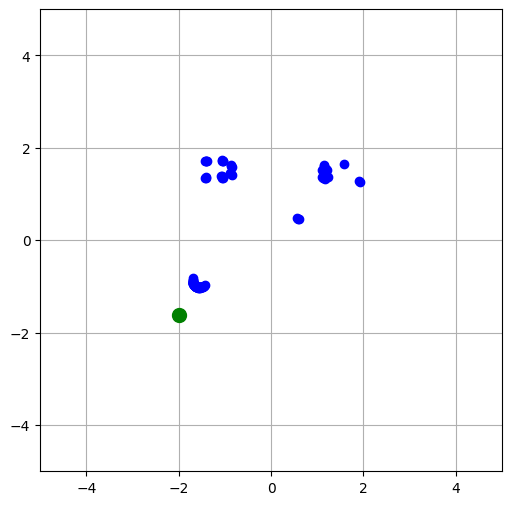

### Posição 3

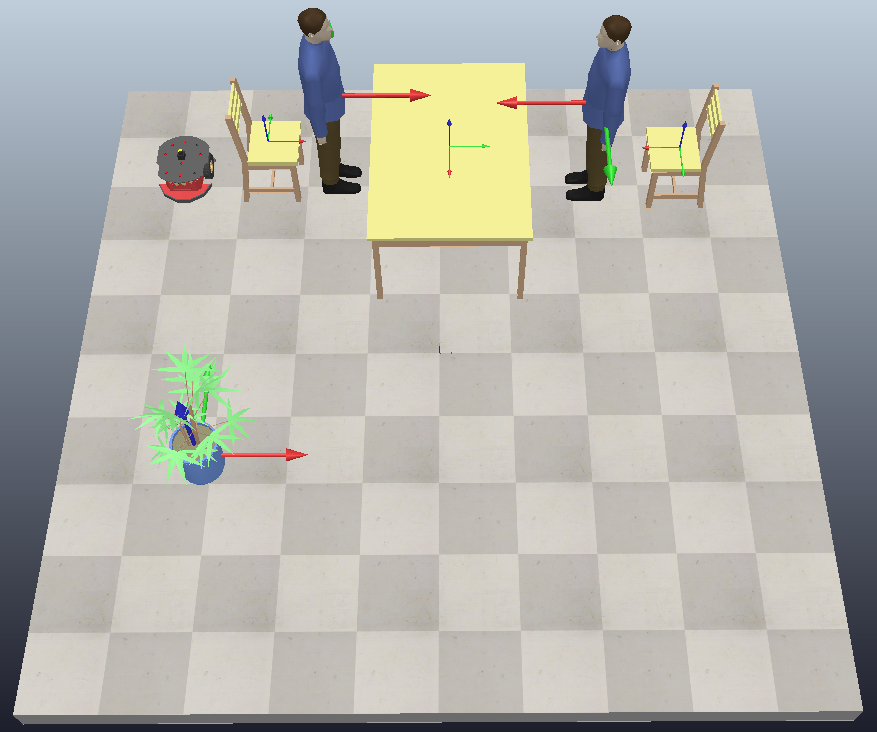


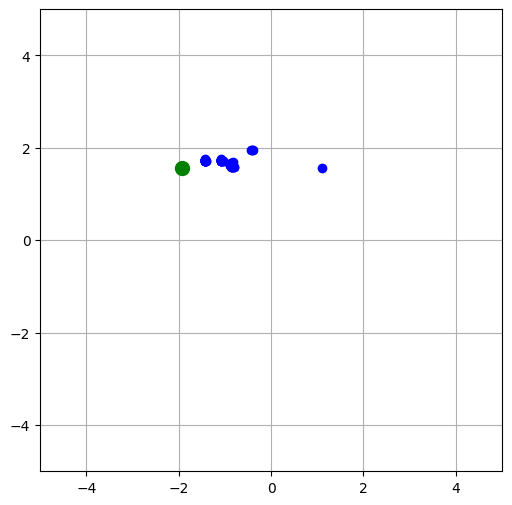

## Questão 6

In [74]:
# Usando a transformada para transformar um ponto no referencial do laser para um ponto no referencial do mundo
from matplotlib.animation import FuncAnimation

def draw_cummulative_laser_data(laser_data,transformation_matrix,robot_position, max_sensor_range=5):
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # Esse plot ta ruim não sei resolver
    # for i in range(len(laser_data)):
       # ang, dist = laser_data[i]
        
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
      #   if (max_sensor_range - dist) > 0.2:
      #       x = dist * np.cos(ang)
       #      y = dist * np.sin(ang)
       #      c = 'r'
      #       if ang < 0:    
      #           c = 'b'
       #      point_laser = np.array([x,y,0,1])
       #      point_world = transformation_matrix @ point_laser
       #      ax.plot(point_world[0], point_world[1], 'o', color=c)

    # Plotando a linha tracejada da tragetória do robô
    xdata = np.array([]) 
    ydata = np.array([])
    for i in range(len(robot_position)):
        xdata = np.append(xdata,robot_position[i][0])
        ydata = np.append(ydata,robot_position[i][1])
    ax.plot(xdata, ydata, linestyle='dotted')
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])
    plt.show()

Program started


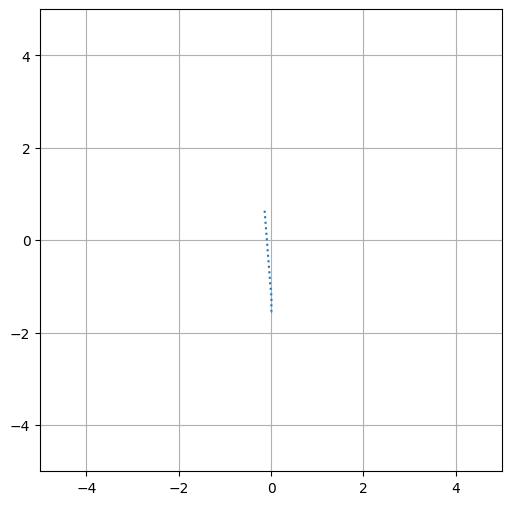

Program ended


In [75]:
# Alterando o script original para a nova api
sim.stopSimulation()

print ('Program started')
sim.startSimulation()

    
# Handle para o ROBÔ    
robotname = 'Pioneer_p3dx'
robot_handle = sim.getObject("/Pioneer_p3dx") 

# Handle para as juntas das RODAS
l_wheel = sim.getObject("/Pioneer_p3dx/Pioneer_p3dx_leftMotor")
r_wheel = sim.getObject("/Pioneer_p3dx/Pioneer_p3dx_rightMotor")

# Handle para os dados do LASER
laser_range_data = "hokuyo_range_data"
laser_angle_data = "hokuyo_angle_data"


# Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
# Em loop até garantir que as leituras serão válidas
# Handle Laser
laser_handle = sim.getObject("/Pioneer_p3dx/fastHokuyo")
raw_range_data = [] 
raw_angle_data = []
# Prosseguindo com as leituras
# Garantir uma leitura válida
while len(raw_range_data) == 0 and len(raw_angle_data) == 0:
    raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)

laser_data = np.array([raw_angle_data, raw_range_data]).T
cummulative_laser_data = laser_data
#draw_laser_data(laser_data,Tul,robot_position)

# Esse ponto é a posição do robô em relação ao mundo
robot_position = getPosition(robot_handle)
robot_position = np.array(robot_position)
robot_positions = robot_position

# Dados do Pioneer
L = 0.381   # Metros
r = 0.0975  # Metros

t = 0
while (t := sim.getSimulationTime()) < 5:

    # Fazendo leitura do laser   
    raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T
    cummulative_laser_data = np.append(cummulative_laser_data,laser_data, axis=0)

    # Fazendo a leitura da posição
    # Esse ponto é a posição do robô em relação ao mundo
    robot_position = getPosition(robot_handle)
    robot_position = np.array(robot_position)
    robot_positions = np.vstack ((robot_positions, robot_position) )
    
    # Velocidade básica (linear, angular)
    v = 0
    w = np.deg2rad(0)      

    frente = int(len(laser_data)/2)
    lado_direito = int(len(laser_data)*1/4)
    lado_esquerdo = int(len(laser_data)*3/4)

    if laser_data[frente, 1] > 2:
        v = .5
        w = 0
    elif laser_data[lado_direito, 1] > 2:
        v = 0
        w = np.deg2rad(-30)
    elif laser_data[lado_esquerdo, 1] > 2:
        v = 0
        w = np.deg2rad(30)
    
    wl = v/r - (w*L)/(2*r)
    wr = v/r + (w*L)/(2*r)
    
    # Enviando velocidades
    sim.setJointTargetVelocity(l_wheel, wl)
    sim.setJointTargetVelocity(r_wheel, wr)        

# Parando o robô    
sim.setJointTargetVelocity(r_wheel, 0)
sim.setJointTargetVelocity(l_wheel, 0)        
   
# Parando a simulação     
sim.stopSimulation()

draw_cummulative_laser_data(cummulative_laser_data,Tul,robot_positions, max_sensor_range=5)

print ('Program ended')